# Face Recognition using CNN

 # Import Lib:

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.models import load_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

# Load "ORL_faces" Dataset:


In [32]:
#load dataset
data = np.load('ORL_faces.npz') 

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

# Split Dataset To train, test Dataset


In [33]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

# Change Size Of Images

need to change The size of images ( The size of images must be the same)

In [34]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))

print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (228, 112, 92, 1)
y_train shape: (228,)
x_test shape: (160, 112, 92, 1)
y_test shape: (160,)


# Step 5


Build CNN model:
 CNN have 3 main layer: 
 * 1-Convolotional layer 
 * 2- pooling layer  
 * 3- fully connected layer
 
 could build a new architecture of CNN by changing the number and position of layers.
 

In [35]:

numClass = 40

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=64, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(numClass, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

Show the model's parameters.

In [36]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 64)        57664     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 29184)             0         
_________________________________________________________________
dense (Dense)                (None, 2024)              59070440  
_________________________________________________________________
dropout (Dropout)            (None, 2024)              0

# Train the Model




In [37]:
batch_size = 512
epochs = 250
verbose = 2


history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=batch_size,
    epochs=epochs, verbose=verbose,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/250
1/1 - 1s - loss: 3.6983 - accuracy: 0.0307 - val_loss: 3.6788 - val_accuracy: 0.0000e+00
Epoch 2/250
1/1 - 0s - loss: 3.6365 - accuracy: 0.0395 - val_loss: 3.6312 - val_accuracy: 0.0000e+00
Epoch 3/250
1/1 - 0s - loss: 3.5810 - accuracy: 0.0746 - val_loss: 3.5592 - val_accuracy: 0.0000e+00
Epoch 4/250
1/1 - 0s - loss: 3.5117 - accuracy: 0.0439 - val_loss: 3.4957 - val_accuracy: 0.0000e+00
Epoch 5/250
1/1 - 0s - loss: 3.4646 - accuracy: 0.0833 - val_loss: 3.4325 - val_accuracy: 0.0000e+00
Epoch 6/250
1/1 - 0s - loss: 3.3985 - accuracy: 0.0746 - val_loss: 3.3767 - val_accuracy: 0.0000e+00
Epoch 7/250
1/1 - 0s - loss: 3.4264 - accuracy: 0.0570 - val_loss: 3.3290 - val_accuracy: 0.0000e+00
Epoch 8/250
1/1 - 0s - loss: 3.4310 - accuracy: 0.0526 - val_loss: 3.2829 - val_accuracy: 0.0000e+00
Epoch 9/250
1/1 - 0s - loss: 3.3621 - accuracy: 0.0570 - val_loss: 3.2422 - val_accuracy: 0.0833
Epoch 10/250
1/1 - 0s - loss: 3.3191 - accuracy: 0.0439 - val_loss: 3.2140 - val_accuracy: 0.08

Epoch 85/250
1/1 - 0s - loss: 0.7936 - accuracy: 0.7895 - val_loss: 0.4204 - val_accuracy: 1.0000
Epoch 86/250
1/1 - 0s - loss: 0.7090 - accuracy: 0.8202 - val_loss: 0.4036 - val_accuracy: 1.0000
Epoch 87/250
1/1 - 0s - loss: 0.7496 - accuracy: 0.7851 - val_loss: 0.3770 - val_accuracy: 1.0000
Epoch 88/250
1/1 - 0s - loss: 0.7165 - accuracy: 0.7807 - val_loss: 0.3488 - val_accuracy: 1.0000
Epoch 89/250
1/1 - 0s - loss: 0.6560 - accuracy: 0.8333 - val_loss: 0.3147 - val_accuracy: 1.0000
Epoch 90/250
1/1 - 0s - loss: 0.7392 - accuracy: 0.8070 - val_loss: 0.2870 - val_accuracy: 1.0000
Epoch 91/250
1/1 - 0s - loss: 0.6653 - accuracy: 0.7982 - val_loss: 0.2695 - val_accuracy: 1.0000
Epoch 92/250
1/1 - 0s - loss: 0.5722 - accuracy: 0.8465 - val_loss: 0.2567 - val_accuracy: 1.0000
Epoch 93/250
1/1 - 0s - loss: 0.5008 - accuracy: 0.8684 - val_loss: 0.2404 - val_accuracy: 1.0000
Epoch 94/250
1/1 - 0s - loss: 0.4780 - accuracy: 0.8465 - val_loss: 0.2132 - val_accuracy: 1.0000
Epoch 95/250
1/1 - 0

Epoch 168/250
1/1 - 0s - loss: 0.0420 - accuracy: 0.9912 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 169/250
1/1 - 0s - loss: 0.0679 - accuracy: 0.9912 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 170/250
1/1 - 0s - loss: 0.0449 - accuracy: 0.9868 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 171/250
1/1 - 0s - loss: 0.0467 - accuracy: 0.9868 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 172/250
1/1 - 0s - loss: 0.0450 - accuracy: 0.9868 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 173/250
1/1 - 0s - loss: 0.0415 - accuracy: 0.9912 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 174/250
1/1 - 0s - loss: 0.0509 - accuracy: 0.9868 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 175/250
1/1 - 0s - loss: 0.0405 - accuracy: 0.9956 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 176/250
1/1 - 0s - loss: 0.0500 - accuracy: 0.9868 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 177/250
1/1 - 0s - loss: 0.0474 - accuracy: 0.9912 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 178/

Evaluate the test data


In [38]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.2452
test acc 0.9438


# Save Model 

In [39]:
cnn_model.save('cnn_model.h5')  
del cnn_model  

# Load Model

In [40]:
cnn_model = load_model('cnn_model.h5')

# Result Visualization 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


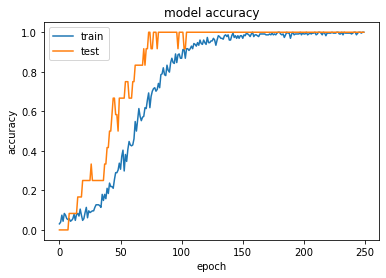

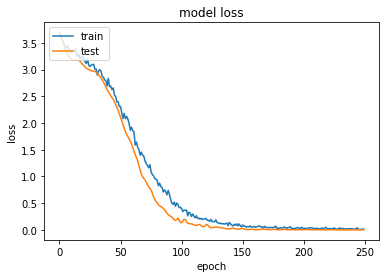

In [41]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Confusion Matrix

(160, 112, 92, 1)
accuracy : 
0.94375
Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix, without normalization


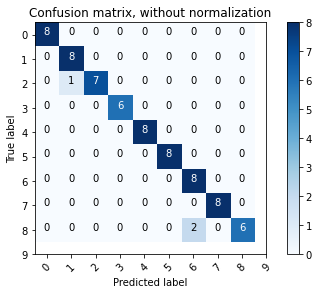

Confusion matrix, without normalization


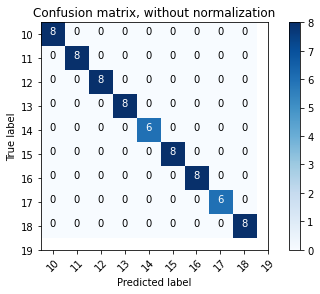

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1

In [47]:
predicted =np.array( cnn_model.predict(x_test))
#print(predicted)
#print(y_test)
ynew = cnn_model.predict_classes(x_test)


Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))

0


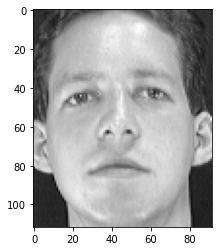

In [48]:
samplePicIndex = 0
print(y_test[samplePicIndex])

samplePic = x_test[samplePicIndex].reshape(x_test[samplePicIndex].shape[0], -1)
plt.imshow(simplePic, cmap = "gray")


samplePicInput = x_test[samplePicIndex].reshape(1, samplePic.shape[0], samplePic.shape[1], 1)

In [50]:

samplePicInput = x_test[samplePicIndex].reshape(1, samplePic.shape[0], samplePic.shape[1], 1)
predicted =np.array(cnn_model.predict(samplePicInput))
predicted.argmax()

0